In [1576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stcs
from pandas import DataFrame
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [1577]:
PATH_CODED_IDS_TRAIN = "data/users/coded_ids_labels_train.csv"
PATH_CODED_IDS_TEST = "data/users/coded_ids_labels_test.csv"
PATH_FEATURES = "data/users_features/features.csv"
PATH_CODED = "data/users/coded_ids.csv"

In [1578]:
report_users = pd.read_csv(PATH_CODED_IDS_TEST)
coded_ids = pd.read_csv(PATH_CODED)
train_users = pd.read_csv(PATH_CODED_IDS_TRAIN)
features = pd.read_csv(PATH_FEATURES)
print("number of elements in train : " , len(train_users))

number of elements in train :  686


## Plot of spam/legit pie chart

118
568


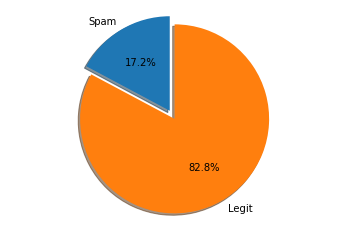

In [1579]:
spam_counter = 0
legit_counter = 0
train_len = len(train_users)
for i in train_users[:]['label']:
    if i == 1:
        spam_counter += 1
    else:
        legit_counter += 1
print(spam_counter)
print(legit_counter)

labels = 'Spam', 'Legit'
pie_sizes = [100 / train_len * spam_counter, 100 / train_len * legit_counter]
fig1, ax1 = plt.subplots()
ax1.pie(pie_sizes, explode=(0.1, 0), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Data preprocessing

In [1580]:
#NaN clearing
# print(features.dtypes.to_string(max_rows=10000))
(value_nan, features_nan) = np.where(pd.isnull(features))
features_nan = list(dict.fromkeys(features_nan))

print("columns with NaN deleted : ", list(features.columns[features_nan]))

#Dropping of NaN containing columns
# features = features.drop(list(features.columns[features_nan]), axis=1)

#Dropping of Null containing columns
features = features.drop('spam_in_screen_name', axis=1)

#Object features clearing
features = features.select_dtypes(exclude=[object])
print('number of features : ', len(features.columns))
print('number of object type features : ', len(features.dtypes[features.dtypes == object]))



columns with NaN deleted :  ['spam_in_screen_name', 'time_zone', 'utc_offset']
number of features :  136
number of object type features :  0


## Joining tables and splitting train/test

In [1581]:
features_ids = pd.merge(features, coded_ids, on='user_id', how='right')
features = pd.merge(features_ids, train_users, on='coded_id')
report_features = pd.merge(features_ids, report_users, on='coded_id')

#Setting values type to float64
features = features.apply(pd.to_numeric).astype('float64')
# report_features = pd.merge(features_ids, report_users, on='coded_id')
#Removing user_id and coded_id
X = features.iloc[:, :-3]
ids_report = report_features['coded_id']
X_report = report_features.iloc[:, :-3]
y = features.loc[:, 'label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=40
)


X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())
X_report = X_report.fillna(X_report.mean())




(value_nan, features_nan) = np.where(pd.isnull(X_train))
features_nan = list(dict.fromkeys(X_train))
# print(features_nan)
# print("columns with NaN deleted : ", list(X_train.columns[features_nan]))


#Normalizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.fit_transform(X_test.values)
X_report_scaled = scaler.fit_transform(X_report.values)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_report = pd.DataFrame(X_report_scaled, columns=X_report.columns)

# print(y_train.to_string(max_rows=150000))
# for j in X_train.isnull().values:
#     [print(i) for i in j if i == False]

# for j in X_train.isnull().values:
#     [print(i) for i in j if i == True]


# print(X_train.isnull().sum().to_string(max_rows=1500))

## Plot of the best features

d:\python\3.9.1\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Index(['active_tweeting_frequency_per_day', 'adjusted_nb_of_uses_of_hashtag',
       'adjusted_nb_of_uses_of_mention', 'adjusted_nb_of_uses_of_sources',
       'adjusted_nb_of_uses_of_url', 'age', 'avg_intertweet_times_seconds',
       'content_duration_days', 'default_profile', 'default_profile_image',
       ...
       'temporal_bin_6', 'temporal_bin_7', 'time_since_newest_tweet_days',
       'time_since_newest_tweet_months', 'tweeting_frequency_per_day',
       'tweets_with_at_top_20', 'tweets_with_hashtags_top_20',
       'tweets_with_urls_top_20', 'urls_used_on_average', 'user_id'],
      dtype='object', length=135)
[8.27559448e-04 1.57384349e-03 2.11656353e-03 3.11252796e-03
 4.75973174e-03 6.19957410e-03 3.41898568e-02 6.96396925e-02
 7.68012128e-02 7.98662837e-02 9.23045613e-02 1.00689736e-01
 1.29273611e-01 3.01898064e-01 4.81794169e-01 4.89613478e-01
 6.02991372e-01 7.59566370e-01 8.69432225e-01 1.16541959e+00
 1.61887560e+00 1.82497515e+00 2.11777836e+00 2.32824083e+00
 2.38

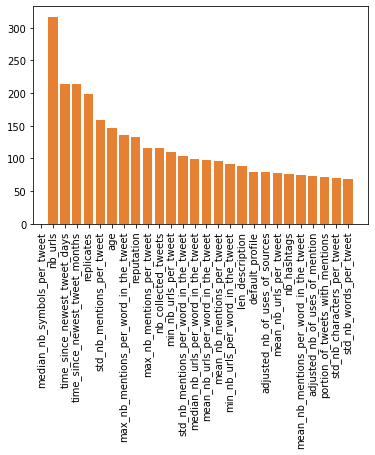

In [1582]:
# kb = SelectKBest(score_func=f_regression, k=10)
# kb.fit(X_train, y_train)
# indices = np.argsort(kb.scores_)[::-1]
# selected_features = []
# for i in range(30):
#   selected_features.append(X.columns[indices[i]])
# plt.figure()
# plt.bar(selected_features, kb.scores_[indices[range(30)]], color=(0.9,0.5,0.2), align='center')
# plt.xticks(rotation=90)
#
# print(X.columns)
# print(kb.scores_[np.argsort(kb.scores_[:])])
# print(indices)
#
# print(selected_features)

## LinearSVC with all non object features

In [1583]:
linearSVC_full = LinearSVC()
linearSVC_full.fit(X_train, y_train)
score = linearSVC_full.score(X_train, y_train)
print("final train score : ", score)


y_pred = linearSVC_full.predict(X_test)

test_report = classification_report(y_test, y_pred)
print(test_report)

final train score :  0.9981751824817519
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       107
         1.0       0.84      0.84      0.84        31

    accuracy                           0.93       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.93      0.93      0.93       138



d:\python\3.9.1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## LinearSVC with top 5 non object features

In [1584]:
X_top_features = ['nb_urls', 'time_since_newest_tweet_months', 'time_since_newest_tweet_days', 'replicates', 'std_nb_mentions_per_tweet']
for feature in X_top_features:
    print("feature : {} | mean : {} | median : {} | variance: {} | min : {} | max : {}"
          .format(feature, stcs.mean(X_train[feature]), stcs.median(X_train[feature]), stcs.variance(X_train[feature]), X_train[feature].min(), X_train[feature].max()))

linearSVC = LinearSVC()
linearSVC.fit(X_train[X_top_features], y_train)
score = linearSVC.score(X_train[X_top_features], y_train)
print("\nfinal train score : ", score)


y_pred = linearSVC.predict(X_test[X_top_features])

test_report = classification_report(y_test, y_pred)
print(test_report)

feature : nb_urls | mean : 2.1302594218222487e-17 | median : -0.33270331302897704 | variance: 1.0018281535648996 | min : -1.0306499604090253 | max : 5.351729208118353
feature : time_since_newest_tweet_months | mean : -4.144343019614664e-17 | median : -0.3565792969056095 | variance: 1.0018281535648994 | min : -0.3632792953525244 | max : 7.723618830073798
feature : time_since_newest_tweet_days | mean : 7.717620135823825e-18 | median : -0.3565792969056094 | variance: 1.0018281535648992 | min : -0.36327929535252435 | max : 7.723618830073798
feature : replicates | mean : 2.9571020713206834e-17 | median : -0.39768607930312666 | variance: 1.0018281535648994 | min : -0.6059115407874331 | max : 5.57678293097736
feature : std_nb_mentions_per_tweet | mean : -2.745657916797039e-17 | median : -0.04235500724633792 | variance: 1.0018281535648994 | min : -1.674182054031672 | max : 3.971999487149537

final train score :  0.9598540145985401
              precision    recall  f1-score   support

        

d:\python\3.9.1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## SVC (RDF)

In [1585]:
linearRDF = svm.SVC(kernel='rbf', C=1)
linearRDF.fit(X_train, y_train)
score = linearRDF.score(X_train, y_train)
y_pred = linearRDF.predict(X_test)

test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       107
         1.0       0.94      0.94      0.94        31

    accuracy                           0.97       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.97      0.97      0.97       138



## report prediction

In [1586]:
report_pred = linearRDF.predict(X_report)

report_df = DataFrame({'coded_id': ids_report
                      ,'label': map(int, report_pred.tolist())})

print(report_df)
# report_df.to_csv("coded_ids_labels_test.csv", index=False, index_label=['coded_id', 'label'])

    coded_id  label
0          5      0
1         26      1
2         37      1
3         40      0
4         52      1
..       ...    ...
76       729      0
77       745      0
78       746      0
79       757      0
80       762      0

[81 rows x 2 columns]
